## Takes just the fifteen residues of all the positives sequences belonging to the five training sets to build the Position-Specific Weight Matrix.

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

## Create the function that gives back the W matrix

In [2]:
def get_pswm(training,upstream_position,downstream_position):
    """
    Build a Position Specific Weight Matrix (PSWM) from protein sequences.
    """
    training.reset_index(inplace=True)  # Reset index for convenience and ensure compatibility with the function
    # Extract the subsequence around the cleavage site for each protein

    for index,row in training.iterrows():
        sequence_to_recover=row["Sequence"]
        cleavage_position=int(row["SPEnd"])
        training.loc[index, "Sequence"] = sequence_to_recover[cleavage_position-upstream_position:cleavage_position+downstream_position]
  
    # Initialize PSWM dictionary with one entry per amino acid
    pswm={"A": "", "R": "", "N": "", "D": "", "C": "", "Q": "", "E": "", "G": "", "H": "", "I": "", "L": "", "K": "", "M": "", "F": "", "P": "", "S": "", "T": "", "W": "", "Y": "", "V": ""}
    position=[]

    # Background frequencies from SwissProt
    swiss_frequencies = { "A" : 0.0825 , "R" : 0.0552 , "N" : 0.0406 , "D" : 0.0546 , "C" : 0.0138 , "Q" : 0.0393, "E" : 0.0671, "G" : 0.0707, "H" : 0.0227, "I" : 0.0590 ,"L" : 0.0964, "K" : 0.0579, "M" : 0.0241, "F" : 0.0386, "P" : 0.0474, "S" : 0.0665, "T" : 0.0536, "W" : 0.0110, "Y" : 0.0292 , "V": 0.0685}
   
    # Initialize counts with 1 (pseudocounts)
    for i in range(len(training.loc[1,"Sequence"])):
        position.append(1)
    for key in pswm:
        pswm[key]=position[:]
        
    #update all the counts for each position and aminoacid
    i=0
    for index, row in training.iterrows():
        i=0
        for aa in row["Sequence"]:
            if aa=='X':
                pass
            else:
                pswm[aa][i]+=1
            i+=1
    
    N=len(training) #number of sequences
    
    # Compute log-odds scores for the PSWM
    for key in pswm:
        for i in range(len(pswm[key])):
            pswm[key][i]=math.log((pswm[key][i]/(N+20))/swiss_frequencies[key])
    return pswm

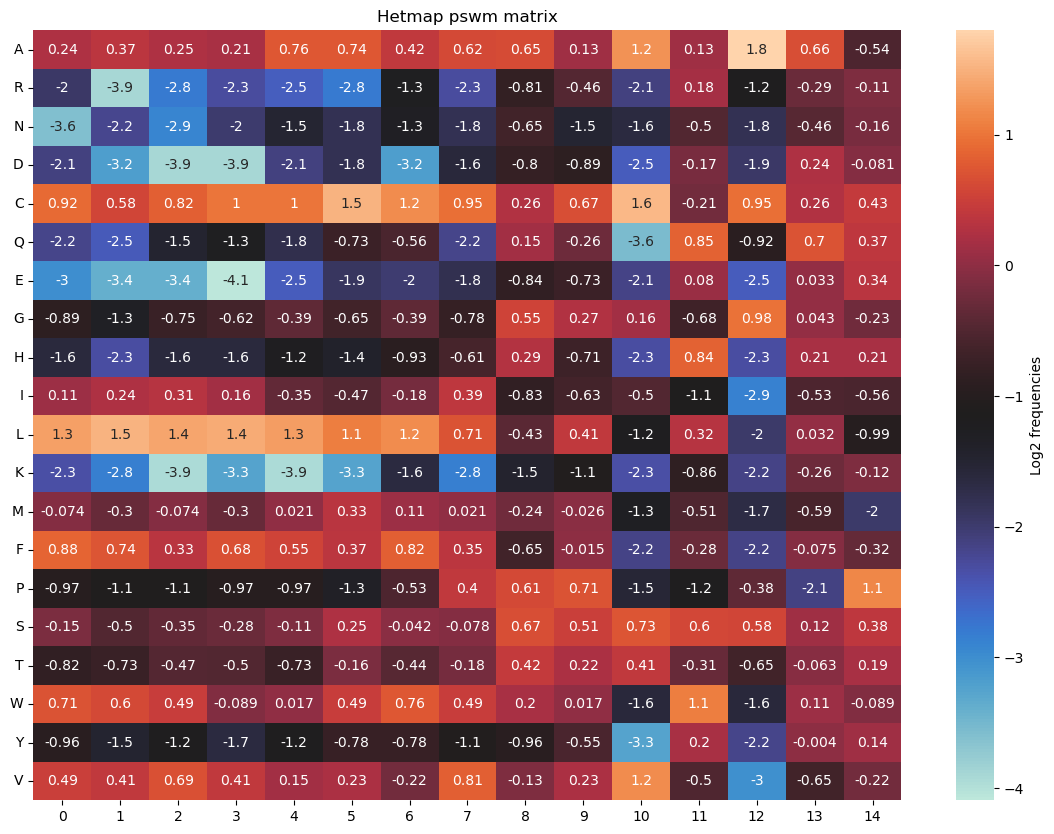

In [9]:
if __name__=='__main__':
    df=pd.read_csv("train_bench.tsv", sep="\t")
    df_pos=df.query("Class=='Positive' and (Set=='1' or Set=='2' or Set=='3' or Set=='4' or Set=='5')")
    pswm=pd.DataFrame(get_pswm(df_pos,13,2))
    plt.figure(figsize=(14,10))
    sns.heatmap(pswm.T,annot= True,cbar = True, cmap = "icefire",cbar_kws = {'label': 'Log2 frequencies'})
    plt.title("Hetmap pswm matrix")
    plt.yticks(rotation = 0)
    plt.savefig("Heatmap_PSWM_1", dpi=300, bbox_inches="tight")



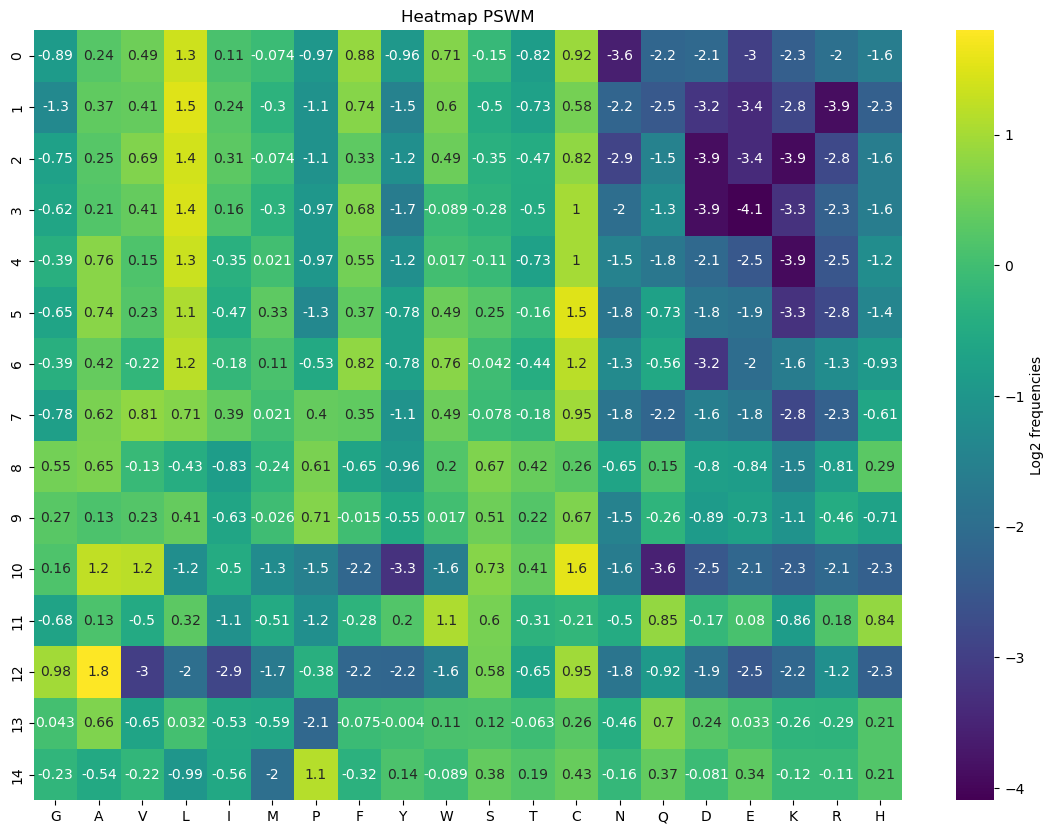

In [8]:
ordered = ["G","A","V","L","I","M","P",
           "F","Y","W",
           "S","T","C","N","Q",
           "D","E",
           "K","R","H"]
    
pswm_ord = pswm.loc[:, [aa for aa in ordered]]
plt.figure(figsize=(14,10))
sns.heatmap(pswm_ord, annot=True, cbar=True,
              cmap="viridis",
              cbar_kws={'label': 'Log2 frequencies'})
    
plt.title("Heatmap PSWM")
plt.savefig("Heatmap_PSWM_2", dpi=300, bbox_inches="tight")